<a href="https://colab.research.google.com/github/annisaeka123/PCVK-_Semester-5/blob/main/week5/Week5_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODUL 6 – Histogram, Histogram Equalization, Dithering**

Nama: Annisa Eka Puspita

Kelas: TI-3H

Absen: 02

NIM: 2341720131


---



**A. PERCOBAAN HISTOGRAM**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
import math
import os
import glob

<BarContainer object of 256 artists>

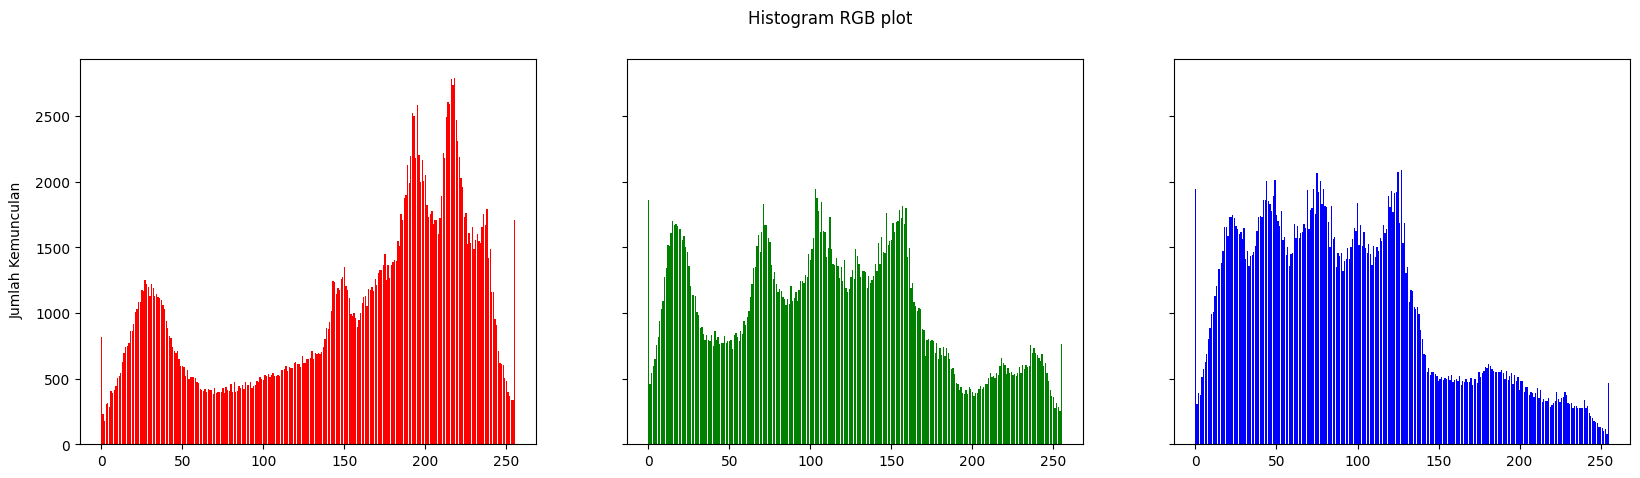

In [ ]:
#membuat histogram Image (manual)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
  for x in range(0, width) :
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

**PERTANYAAN PRAKTIKUM A**

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?


<BarContainer object of 256 artists>

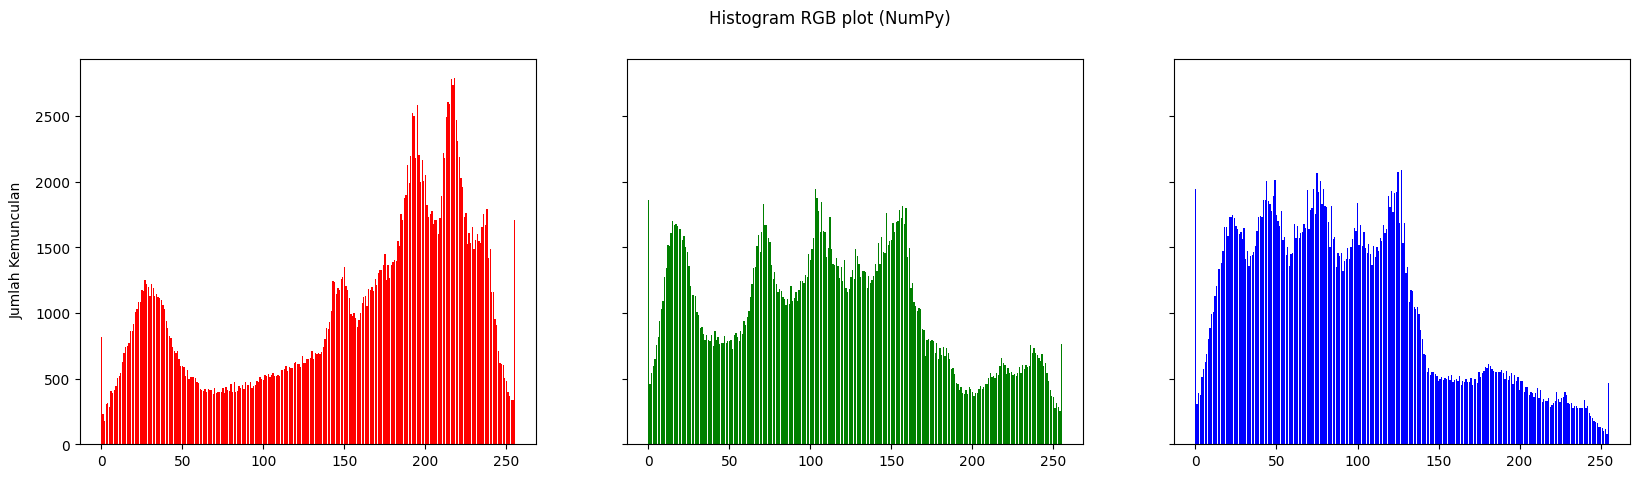

In [ ]:
#Histogram RGB dengan NumPy
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img)

# Histogram dengan NumPy
hist_r, bins_r = np.histogram(r.ravel(), bins=256, range=[0, 256])
hist_g, bins_g = np.histogram(g.ravel(), bins=256, range=[0, 256])
hist_b, bins_b = np.histogram(b.ravel(), bins=256, range=[0, 256])

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')

axs[0].bar(names, hist_r, color='red')
axs[1].bar(names, hist_g, color='green')
axs[2].bar(names, hist_b, color='blue')


Output histogram manual atau menggunakan NumPy hasilnya sama.

2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

<class 'numpy.ndarray'> (500, 800)


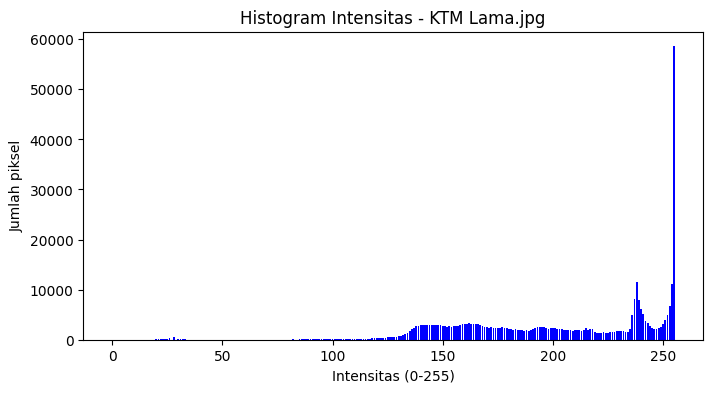

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTM_lama.jpg', cv.IMREAD_GRAYSCALE)

# Pastikan gambar berhasil dibaca
print(type(img), img.shape)

# Hitung histogram dengan NumPy
hist, bins = np.histogram(img.ravel(), bins=256, range=[0, 256])

# Plot histogram
plt.figure(figsize=(8,4))
plt.bar(np.arange(256), hist, color='blue')
plt.title("Histogram Intensitas - KTM Lama.jpg")
plt.xlabel("Intensitas (0-255)")
plt.ylabel("Jumlah piksel")
plt.show()

Histogram intensitas dari gambar **KTM Lama.jpg** menunjukkan bahwa distribusi piksel lebih banyak terkonsentrasi pada intensitas tinggi, yaitu di kisaran 230–255. Hal ini terlihat dari puncak histogram yang sangat dominan di sisi kanan, sementara pada rentang intensitas rendah (0–100) hampir tidak terdapat piksel, dan pada rentang menengah (100–200) hanya terdapat sedikit distribusi. Kondisi ini mengindikasikan bahwa gambar cenderung sangat terang dengan sebagian besar area berwarna putih atau mendekati putih. Selain itu, distribusi intensitas yang tidak merata di seluruh rentang menyebabkan gambar memiliki kontras yang rendah, sehingga detail pada area gelap maupun sedang tidak terlalu menonjol. Dengan demikian, dapat disimpulkan bahwa gambar KTM Lama lebih dominan terang namun kurang memiliki ketajaman kontras.


 **B. PERCOBAAN *HISTOGRAM EQUALIZATION***

1. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization

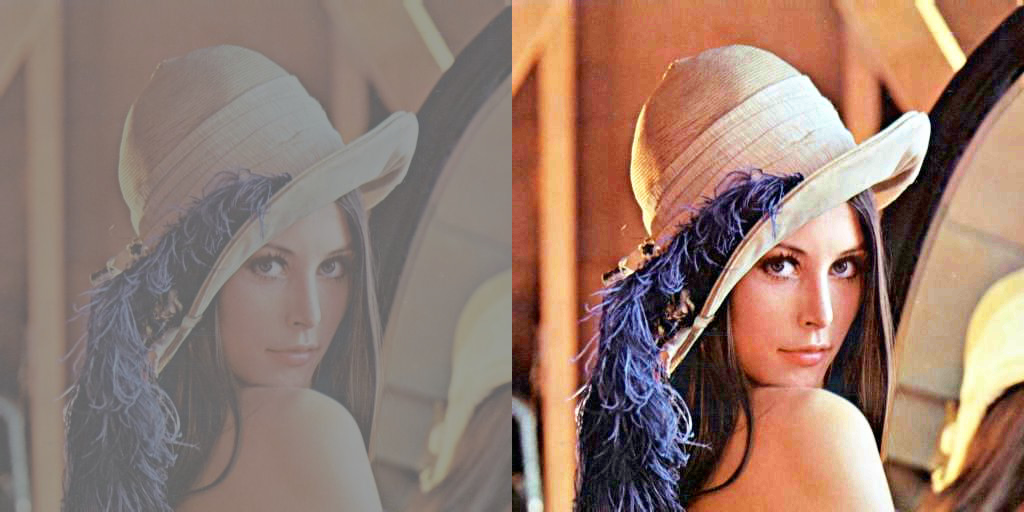

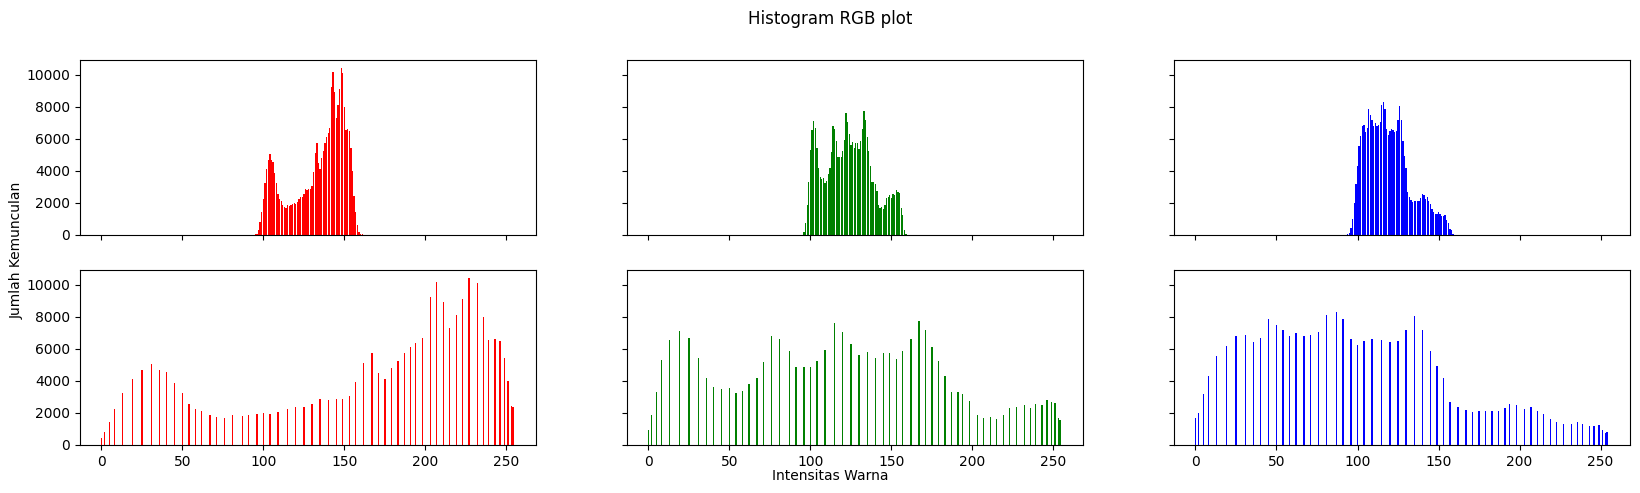

In [ ]:
# Baca gambar (warna asli)
img1= cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi) dgn histogram array
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
#histogram_array yang telah mengalami penjumlahan akan dinormalisasi dengan cara membaginya
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
#Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
#implementasi rumus K0 (skala warna) setelah pembagian dengan nilai piksel sebelumnya
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
#Menampilkan hasil Histogram Equalization
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array / transformasi kembali dalam bentuk citra
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# tampilan citra hasil Histogram Equalization dan histogram sebelum dan sesudah proses Histogram Equalization
equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”

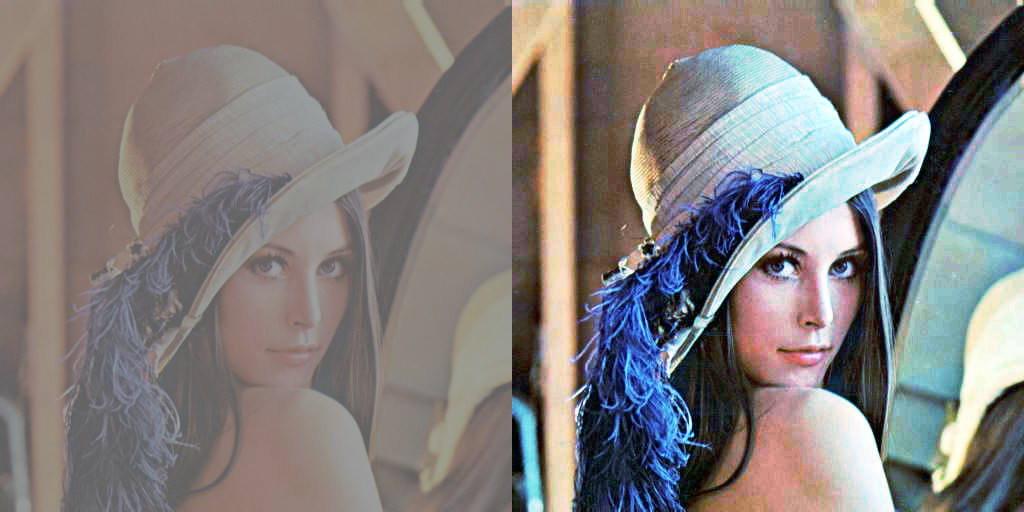

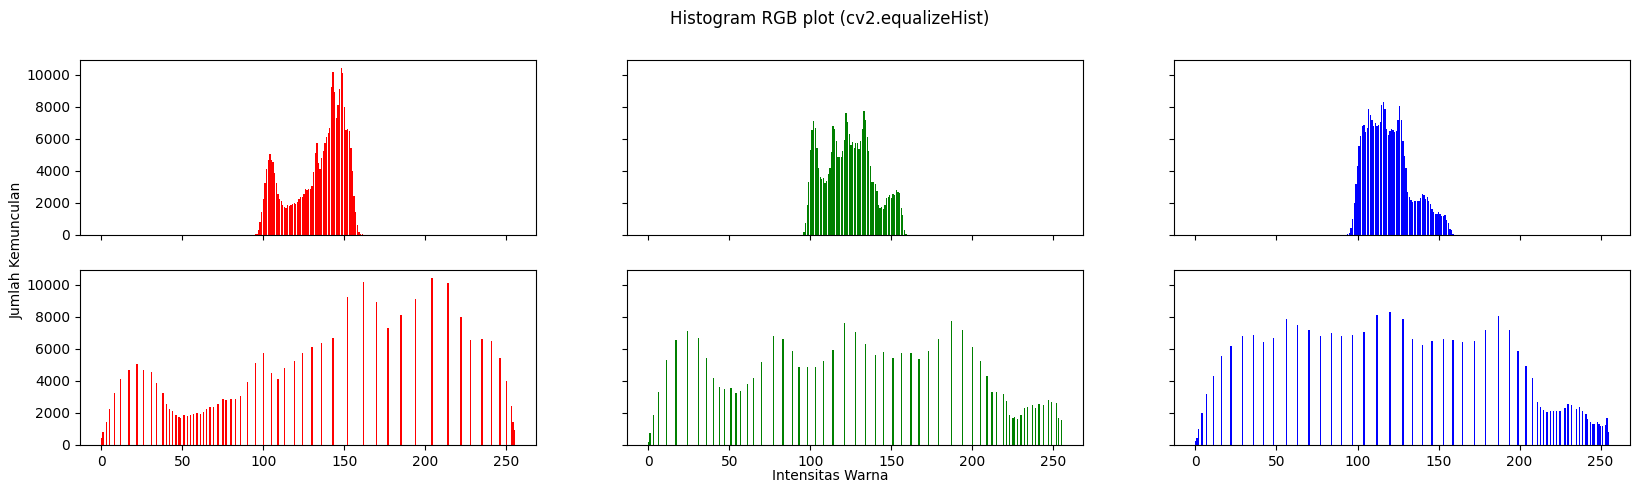

In [ ]:


# Baca gambar
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Split channel
b, g, r = cv.split(img1)

# Equalize per channel
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Gabungkan kembali hasil equalization ke citra berwarna
img_eq = cv.merge((b_equalized, g_equalized, r_equalized))

# Fungsi histogram
def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3,256))
    for y in range(0,height):
        for x in range(0,width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

# Histogram asli dan hasil equalization cv2
histo_asli = histog(img1)
equal_histo_cv = histog(img_eq)

final_frame = cv.hconcat((img1, img_eq))
cv2_imshow(final_frame)

# Plot histogram RGB sebelum dan sesudah
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (cv2.equalizeHist)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo_cv[2], color='red')
axs[1,1].bar(names, equal_histo_cv[1], color='green')
axs[1,2].bar(names, equal_histo_cv[0], color='blue')
plt.show()


**PERTANYAAN PRAKTIKUM B**

1. Perbandingan Citra Lena

  a. Gunakan hasil histogram equalization pada citra lena.jpg.

  b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

  c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas visual citra? Apakah ada detail baru yang muncul setelah equalization?

PSNR R: 17.74874928569945
PSNR G: 22.033646589206025
PSNR B: 16.00996176455004
PSNR Total (RGB): 17.948401486845302


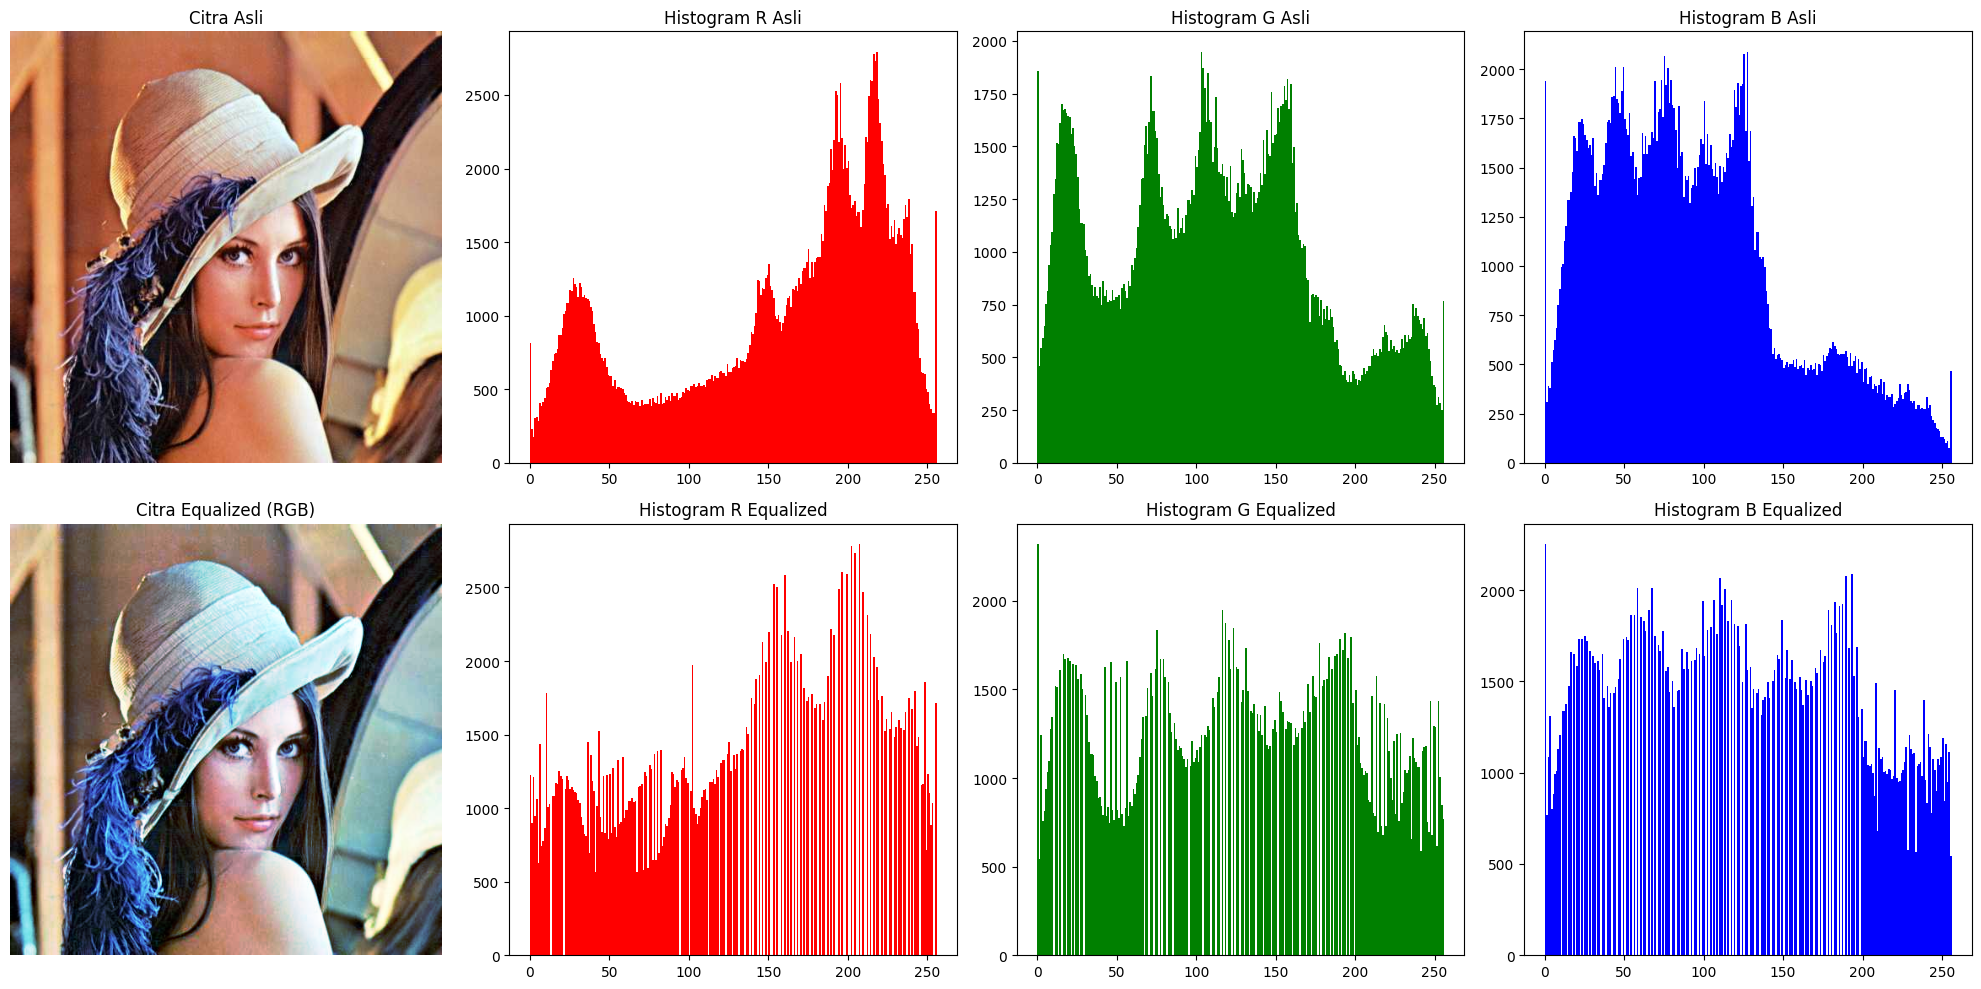

In [ ]:
# Fungsi PSNR
def psnr(original, processed):
    mse = np.mean((original.astype(np.float64) - processed.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# a. Baca citra Lena RGB
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan channel
r, g, b = cv.split(img_rgb)

# Histogram Equalization per channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali hasil equalization
img_eq = cv.merge((r_eq, g_eq, b_eq))

# b. Hitung PSNR per channel
psnr_r = psnr(r, r_eq)
psnr_g = psnr(g, g_eq)
psnr_b = psnr(b, b_eq)

# Hitung PSNR total (RGB)
psnr_total = psnr(img_rgb, img_eq)

print("PSNR R:", psnr_r)
print("PSNR G:", psnr_g)
print("PSNR B:", psnr_b)
print("PSNR Total (RGB):", psnr_total)

# c. Visualisasi: gambar & histogram
fig, axs = plt.subplots(2, 4, figsize=(20,10))

# Citra Asli
axs[0,0].imshow(img_rgb)
axs[0,0].set_title("Citra Asli")
axs[0,0].axis("off")

# Histogram R Asli
axs[0,1].hist(r.ravel(), bins=256, range=(0,256), color='red')
axs[0,1].set_title("Histogram R Asli")

# Histogram G Asli
axs[0,2].hist(g.ravel(), bins=256, range=(0,256), color='green')
axs[0,2].set_title("Histogram G Asli")

# Histogram B Asli
axs[0,3].hist(b.ravel(), bins=256, range=(0,256), color='blue')
axs[0,3].set_title("Histogram B Asli")

# Citra Equalized
axs[1,0].imshow(img_eq)
axs[1,0].set_title("Citra Equalized (RGB)")
axs[1,0].axis("off")

# Histogram R Equalized
axs[1,1].hist(r_eq.ravel(), bins=256, range=(0,256), color='red')
axs[1,1].set_title("Histogram R Equalized")

# Histogram G Equalized
axs[1,2].hist(g_eq.ravel(), bins=256, range=(0,256), color='green')
axs[1,2].set_title("Histogram G Equalized")

# Histogram B Equalized
axs[1,3].hist(b_eq.ravel(), bins=256, range=(0,256), color='blue')
axs[1,3].set_title("Histogram B Equalized")

plt.tight_layout()
plt.show()


Nilai PSNR yang diperoleh pada hasil percobaan tergolong rendah, karena umumnya sebuah citra dengan kualitas baik memiliki PSNR di atas 30 dB. Rendahnya nilai PSNR ini menunjukkan bahwa terdapat perbedaan yang cukup besar antara citra asli dengan citra hasil equalization. Namun, rendahnya PSNR tidak serta-merta berarti kualitas visual citra memburuk. Pada kasus *histogram equalization*, perubahan distribusi intensitas memang diharapkan agar kontras citra meningkat.

Secara visual, citra hasil equalization memperlihatkan peningkatan kontras, sehingga bagian-bagian yang sebelumnya terlihat kurang jelas menjadi lebih detail. Dengan kata lain, meskipun nilai PSNR rendah karena adanya perbedaan intensitas dari citra asli, citra hasil equalization justru memberikan tampilan visual yang lebih tajam dan detail baru muncul terutama pada area yang sebelumnya terlalu gelap atau terlalu terang.

2. Gunakan Citra KTM Lama.jpg

a. Terapkan histogram equalization pada citra KTM lama.jpg.

b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout.

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

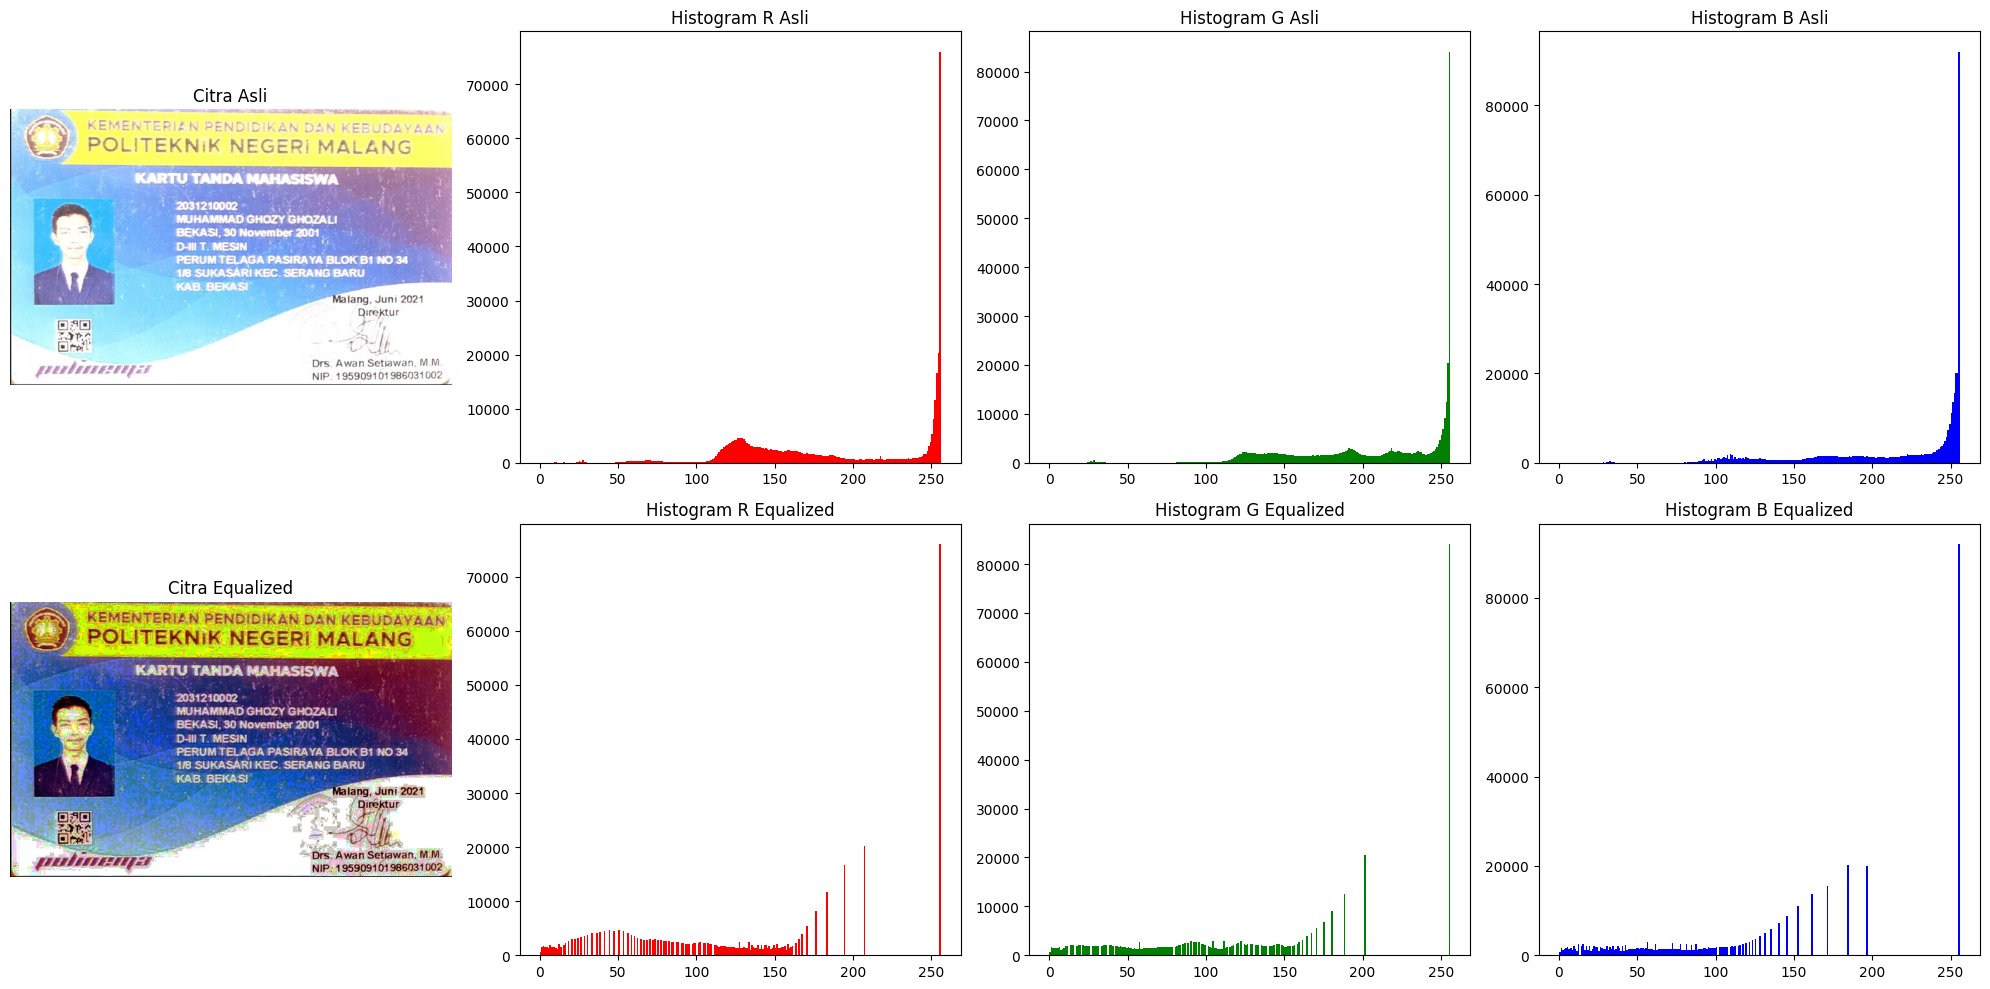

In [ ]:
# a. Baca citra RGB
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTM_lama.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan channel
r, g, b = cv.split(img_rgb)

# Equalization per channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan citra hasil equalization
img_eq = cv.merge((r_eq, g_eq, b_eq))

# b. Plot citra & histogram per channel
fig, axs = plt.subplots(2, 4, figsize=(20,10))

# Citra Asli
axs[0,0].imshow(img_rgb)
axs[0,0].set_title("Citra Asli")
axs[0,0].axis("off")

# Histogram R Asli
axs[0,1].hist(r.ravel(), bins=256, range=(0,256), color='red')
axs[0,1].set_title("Histogram R Asli")

# Histogram G Asli
axs[0,2].hist(g.ravel(), bins=256, range=(0,256), color='green')
axs[0,2].set_title("Histogram G Asli")

# Histogram B Asli
axs[0,3].hist(b.ravel(), bins=256, range=(0,256), color='blue')
axs[0,3].set_title("Histogram B Asli")

# Citra Equalized
axs[1,0].imshow(img_eq)
axs[1,0].set_title("Citra Equalized")
axs[1,0].axis("off")

# Histogram R Equalized
axs[1,1].hist(r_eq.ravel(), bins=256, range=(0,256), color='red')
axs[1,1].set_title("Histogram R Equalized")

# Histogram G Equalized
axs[1,2].hist(g_eq.ravel(), bins=256, range=(0,256), color='green')
axs[1,2].set_title("Histogram G Equalized")

# Histogram B Equalized
axs[1,3].hist(b_eq.ravel(), bins=256, range=(0,256), color='blue')
axs[1,3].set_title("Histogram B Equalized")

plt.tight_layout()
plt.show()


Secara visual, perbedaan yang terlihat antara citra asli dan citra hasil *histogram equalization* cukup jelas. Pada citra asli, keseluruhan tampilan cenderung terlalu terang sehingga detail wajah pada foto, tulisan pada kartu, dan elemen latar belakang kurang menonjol dan agak samar. Setelah dilakukan histogram equalization kontras meningkat secara signifikan: detail wajah menjadi lebih jelas, teks pada kartu lebih mudah dibaca, dan latar belakang terlihat lebih tegas dengan warna yang lebih kuat.

Perubahan ini secara umum meningkatkan kualitas informasi dari citra, terutama dalam hal keterbacaan teks dan kejelasan objek penting. Namun, efek sampingnya adalah citra bisa tampak sedikit terlalu “keras”, dengan warna yang terlihat kurang alami dan kontras yang kadang berlebihan. Jadi, meskipun equalization berhasil memperbaiki detail, hasilnya mungkin tidak ideal untuk tampilan estetis, tetapi cukup bermanfaat untuk tujuan analisis atau pengenalan informasi dari gambar.


**TUGAS PRAKTIKUM DITHERING**

1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

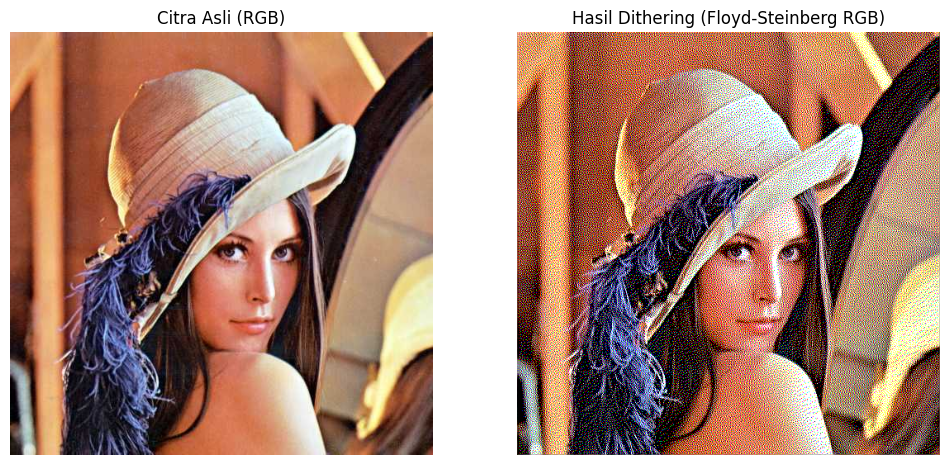

In [ ]:
# 1. Baca citra lena (RGB)
img = cv.imread("/content/drive/MyDrive/PCVK/Images/lena.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# 2. Normalisasi ke [0,1]
h, w, c = img.shape
output = img.astype(np.float32) / 255.0

# 3. Floyd-Steinberg Dithering untuk setiap channel (R,G,B)
for y in range(h-1):
    for x in range(1, w-1):
        for ch in range(3):  # loop untuk R, G, B
            old_pixel = output[y, x, ch]
            new_pixel = 1.0 if old_pixel > 0.5 else 0.0
            output[y, x, ch] = new_pixel
            error = old_pixel - new_pixel

            # Sebarkan error ke tetangga
            output[y,   x+1, ch] += error * 7/16
            output[y+1, x-1, ch] += error * 3/16
            output[y+1, x,   ch] += error * 5/16
            output[y+1, x+1, ch] += error * 1/16

# 4. Konversi hasil ke uint8
dithered = (output * 255).clip(0, 255).astype(np.uint8)

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Citra Asli (RGB)")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Hasil Dithering (Floyd-Steinberg RGB)")
plt.imshow(dithered)
plt.axis("off")

plt.show()


2. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

Gambar Perbandingan


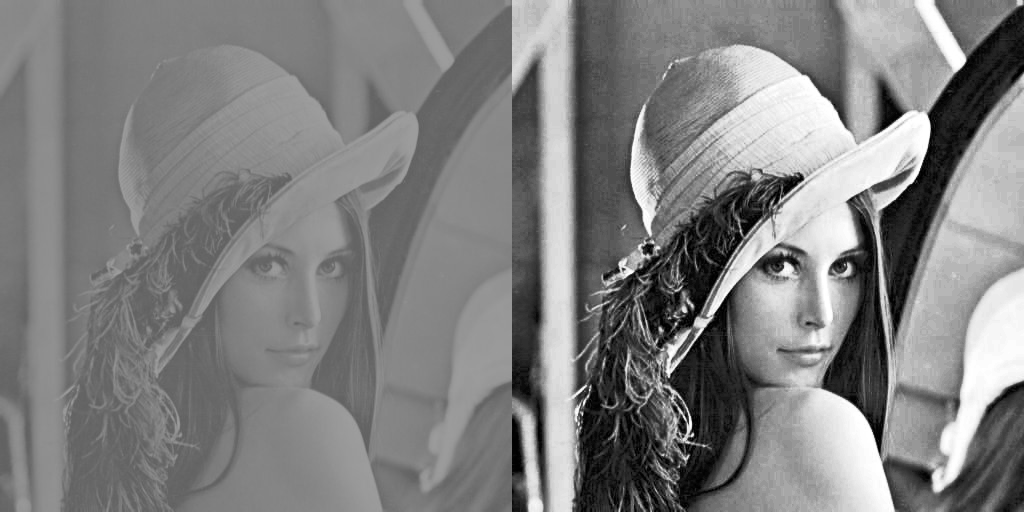

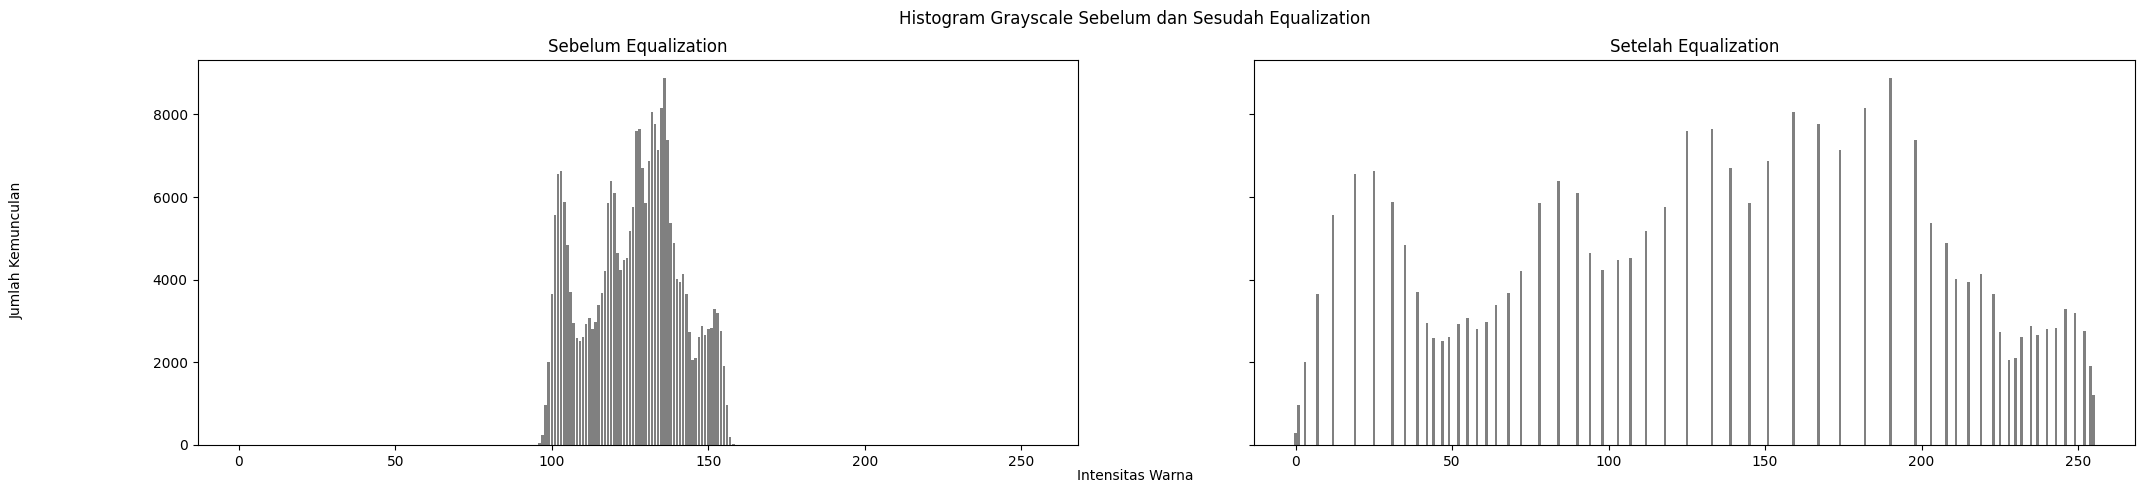

 
Gambar Dithering Floyd and Steinberg


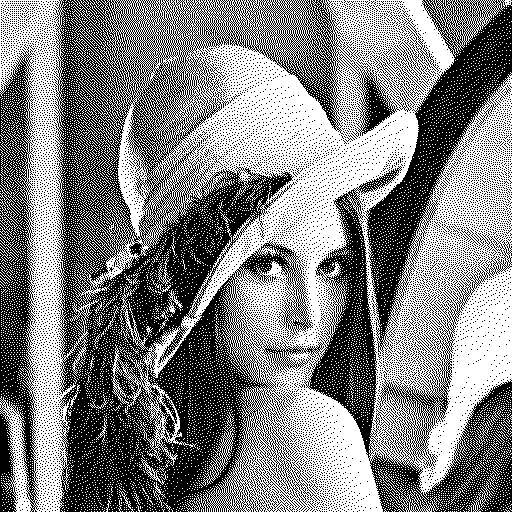

In [ ]:
# Baca gambar dalam grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_img = cv.equalizeHist(img)

# Terapkan proses dithering Floyd and Steinberg
img_float = np.float32(equalized_img)
height, width = img.shape

for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 7 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 3 / 16
            img_float[y + 1, x] += error * 5 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 1 / 16

output_img = np.uint8(img_float)

# Menggabungkan gambar asli dan gambar setelah histogram equalization
final_frame = cv.hconcat((img, equalized_img))

# Menampilkan hasil gabungan
print('Gambar Perbandingan')
cv2_imshow(final_frame)

# Melakukan Histogram Equalization
equalized_img = cv.equalizeHist(img)

# Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan
names = np.arange(256)

# Menghitung jumlah kemunculan setiap pixel sebelum dan sesudah equalization
hist_before = cv.calcHist([img], [0], None, [256], [0, 256])
hist_after = cv.calcHist([equalized_img], [0], None, [256], [0, 256])

# Membuat subplot untuk histogram sebelum dan sesudah equalization
fig, axs = plt.subplots(1, 2, figsize=[25, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale Sebelum dan Sesudah Equalization')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Plot histogram sebelum equalization
axs[0].bar(names, hist_before[:, 0], color='gray')
axs[0].set_title('Sebelum Equalization')

# Plot histogram setelah equalization
axs[1].bar(names, hist_after[:, 0], color='gray')
axs[1].set_title('Setelah Equalization')

plt.show()

print(' ')
print('Gambar Dithering Floyd and Steinberg')
cv2_imshow(output_img)
plt.show()
